# 参考：
https://www.kaggle.com/johndev001/wind-data-analysis-with-some-feature-engineering

# 数据集：
https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In Wind Turbines, Scada Systems measure and save data's like wind speed, wind direction, generated power etc. for 10 minutes intervals. This file was taken from a wind turbine's scada system that is working and generating power in Turkey.

Content The data's in the file are:

- 1) Date/Time (for 10 minutes intervals) 
- 2) LV ActivePower (kW): The power generated by the turbine for that moment 
- 3) Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation) 
- 4) TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer 
- 5) Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

In [1]:
#Installing windrose to have the wind direction overview
!pip install windrose

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 300

In [4]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

from windrose import WindroseAxes

import os
for dirname, _, filenames in os.walk('D:/03 Kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/03 Kaggle\Advanced mataplotlib.ipynb
D:/03 Kaggle\Anomaly Detection Isolation Forest&Visualization-Part I.ipynb
D:/03 Kaggle\Anomaly Detection with Time Series Forecasting-Part II.ipynb
D:/03 Kaggle\compare-6-unsupervised-anomaly-detection-models.ipynb
D:/03 Kaggle\ensemble-clustering.ipynb
D:/03 Kaggle\graph.png
D:/03 Kaggle\Mall Customers Clustering Analysis.ipynb
D:/03 Kaggle\Mall_Customers.csv
D:/03 Kaggle\model.h5
D:/03 Kaggle\model.json
D:/03 Kaggle\motion.jpg
D:/03 Kaggle\motion.png
D:/03 Kaggle\Plotly Tutorial for Beginners.ipynb
D:/03 Kaggle\Unsupervised Anomaly Detection.ipynb
D:/03 Kaggle\Wind Data Analysis with some Feature Engineering.ipynb
D:/03 Kaggle\Wind Turbine Scada Dataset.csv
D:/03 Kaggle\.ipynb_checkpoints\Advanced mataplotlib-checkpoint.ipynb
D:/03 Kaggle\.ipynb_checkpoints\Anomaly Detection Isolation Forest&Visualization-Part I-checkpoint.ipynb
D:/03 Kaggle\.ipynb_checkpoints\Anomaly Detection with Time Series Forecasting-Part II-checkpoint.ipynb
D:/03 Kaggle

In [5]:
df = pd.read_csv('Wind Turbine Scada Dataset.csv')

In [6]:
df.head()

Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286

In [7]:
df.describe()

LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         50530.000000      50530.000000                   50530.000000   
mean           1307.684332          7.557952                    1492.175463   
std            1312.459242          4.227166                    1368.018238   
min              -2.471405          0.000000                       0.000000   
25%              50.677890          4.201395                     161.328167   
50%             825.838074          7.104594                    1063.776283   
75%            2482.507568         10.300020                    2964.972462   
max            3618.732910         25.206011                    3600.000000   

       Wind Direction (°)  
count        50530.000000  
mean           123.687559  
std             93.443736  
min              0.000000  
25%             49.315437  
50%             73.712978  
75%            201.696720  
max            359.997589

In [9]:
df.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [10]:
# Covert Data/time to index and drop columns Date/Time
df.index = df['Date/Time']
df.drop(['Date/Time'], axis=1, inplace=True)
df.head()

LV ActivePower (kW)  Wind Speed (m/s)  \
Date/Time                                                 
01 01 2018 00:00           380.047791          5.311336   
01 01 2018 00:10           453.769196          5.672167   
01 01 2018 00:20           306.376587          5.216037   
01 01 2018 00:30           419.645905          5.659674   
01 01 2018 00:40           380.650696          5.577941   

                  Theoretical_Power_Curve (KWh)  Wind Direction (°)  
Date/Time                                                            
01 01 2018 00:00                     416.328908          259.994904  
01 01 2018 00:10                     519.917511          268.641113  
01 01 2018 00:20                     390.900016          272.564789  
01 01 2018 00:30                     516.127569          271.258087  
01 01 2018 00:40                     491.702972          265.674286

In [11]:
df.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

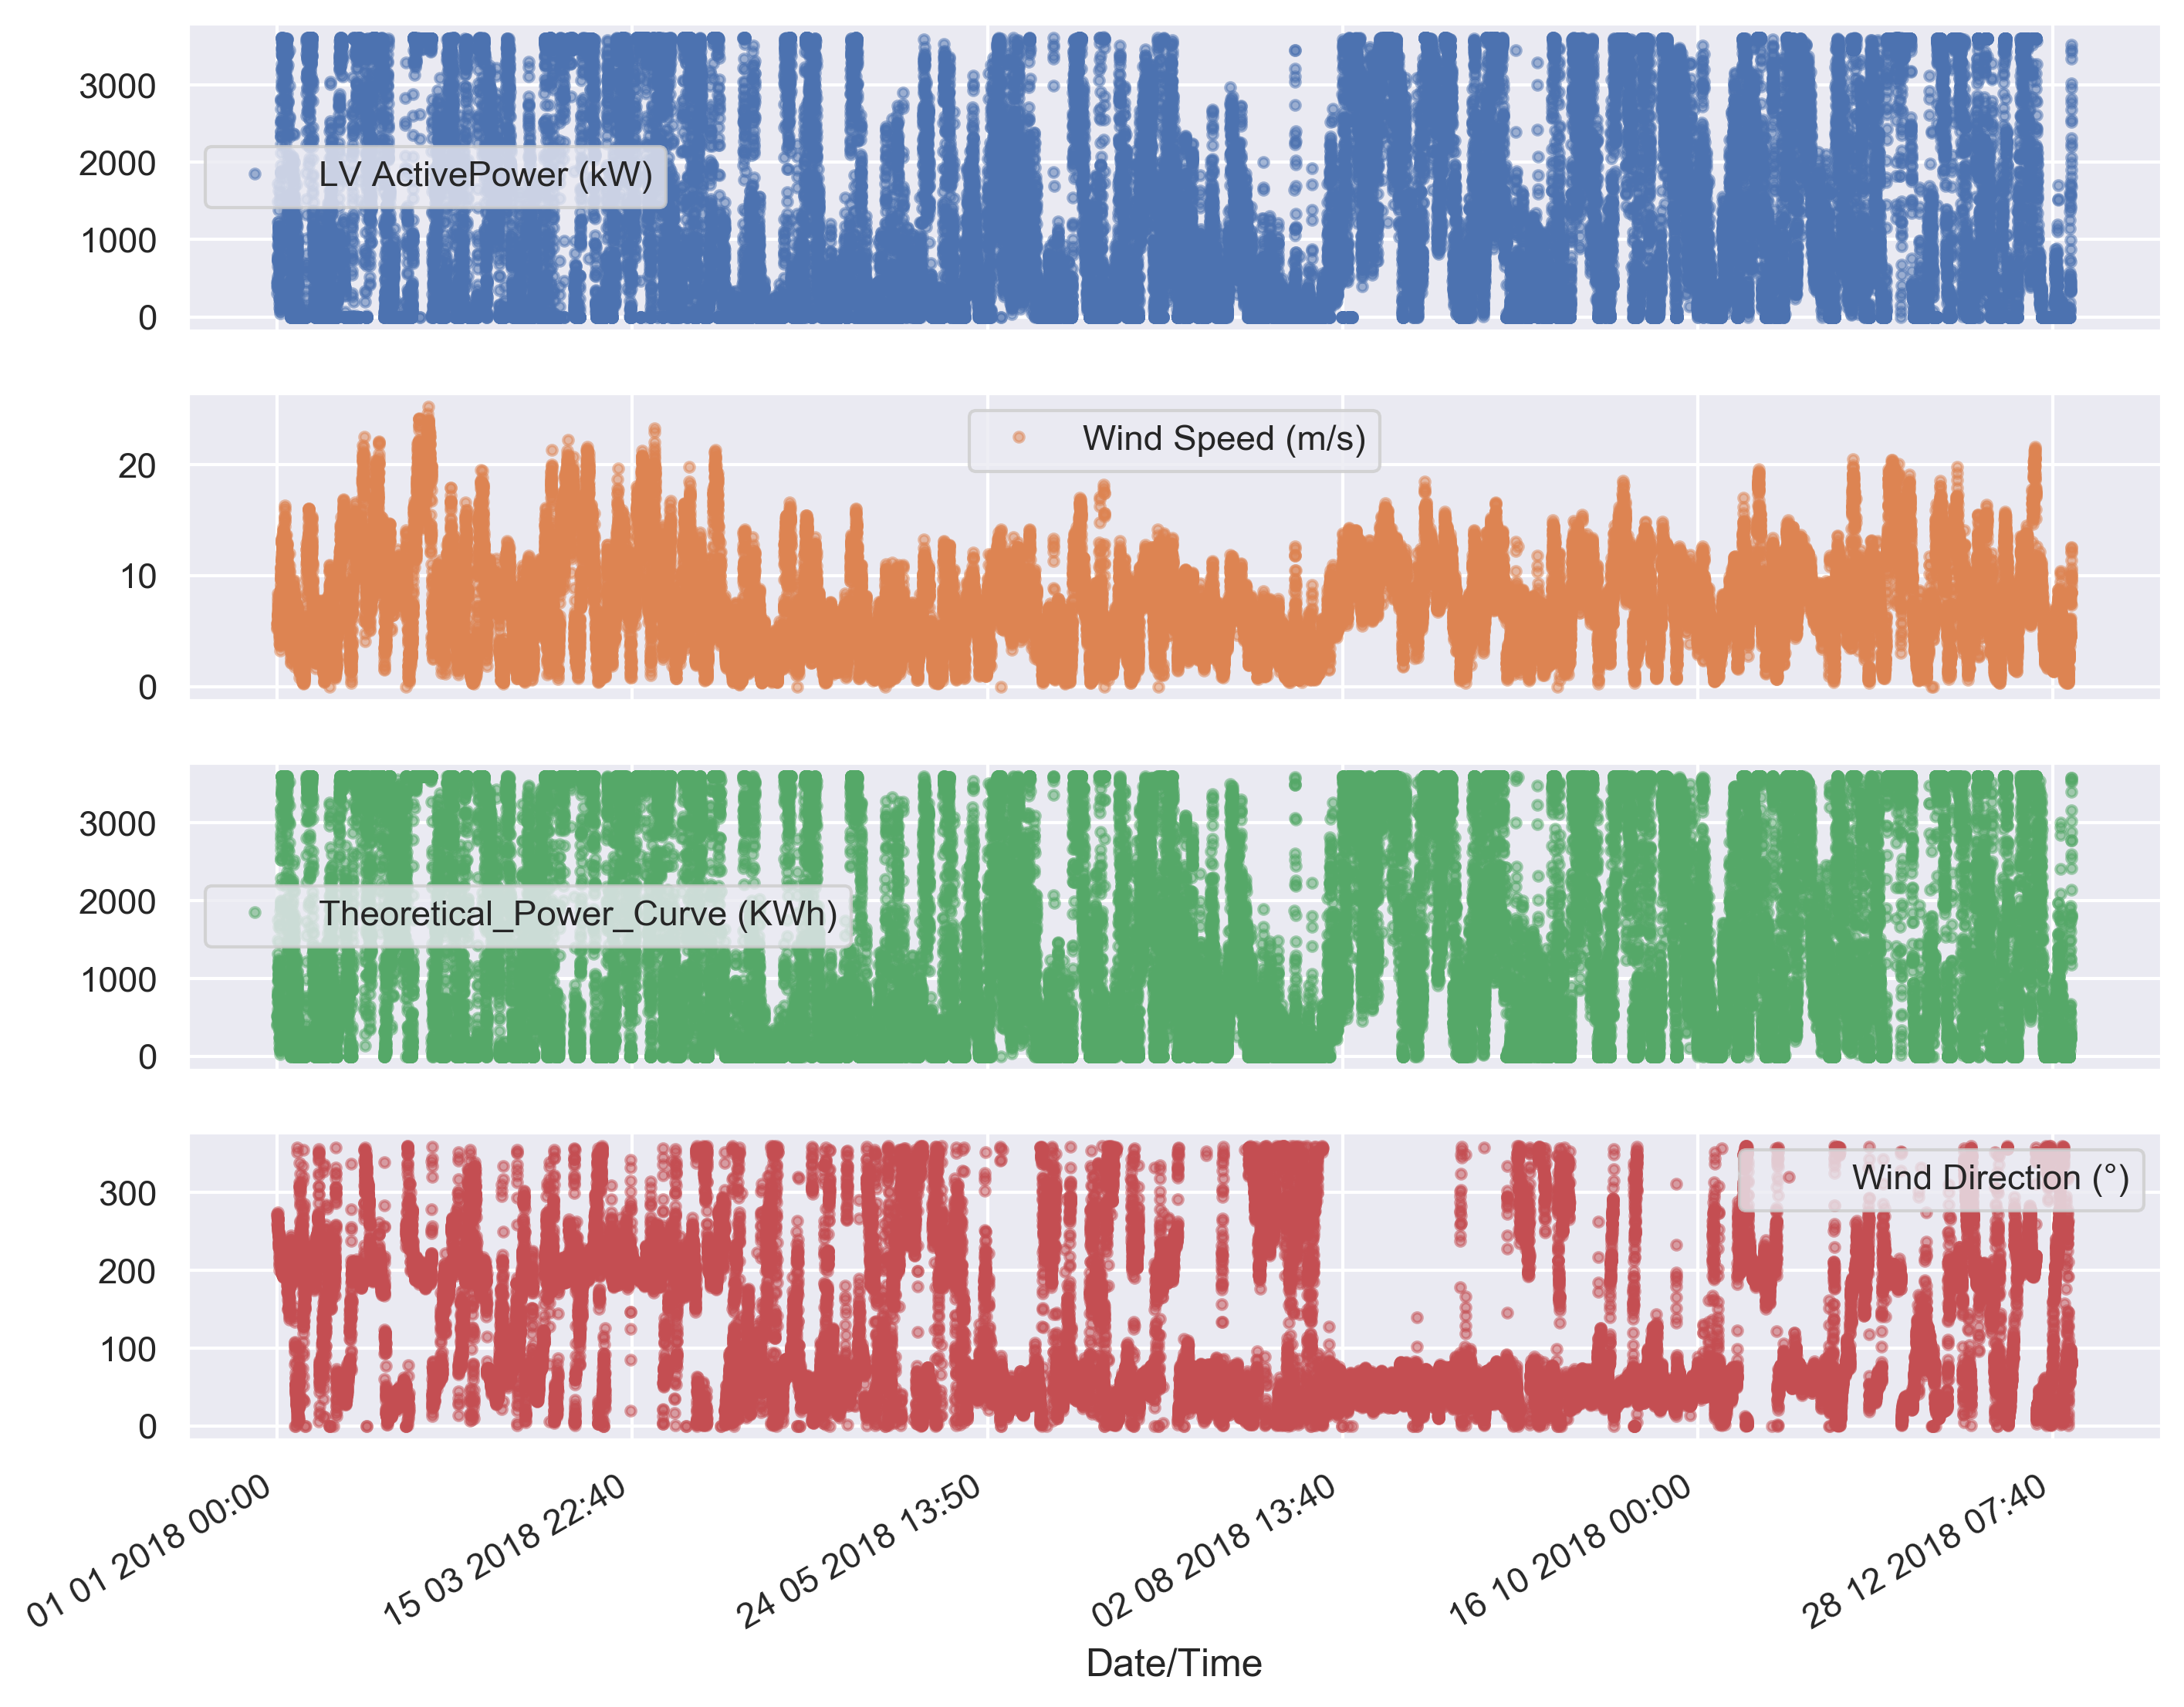

In [13]:
cols_plot = ['LV ActivePower (kW)', 'Wind Speed (m/s)',
             'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)

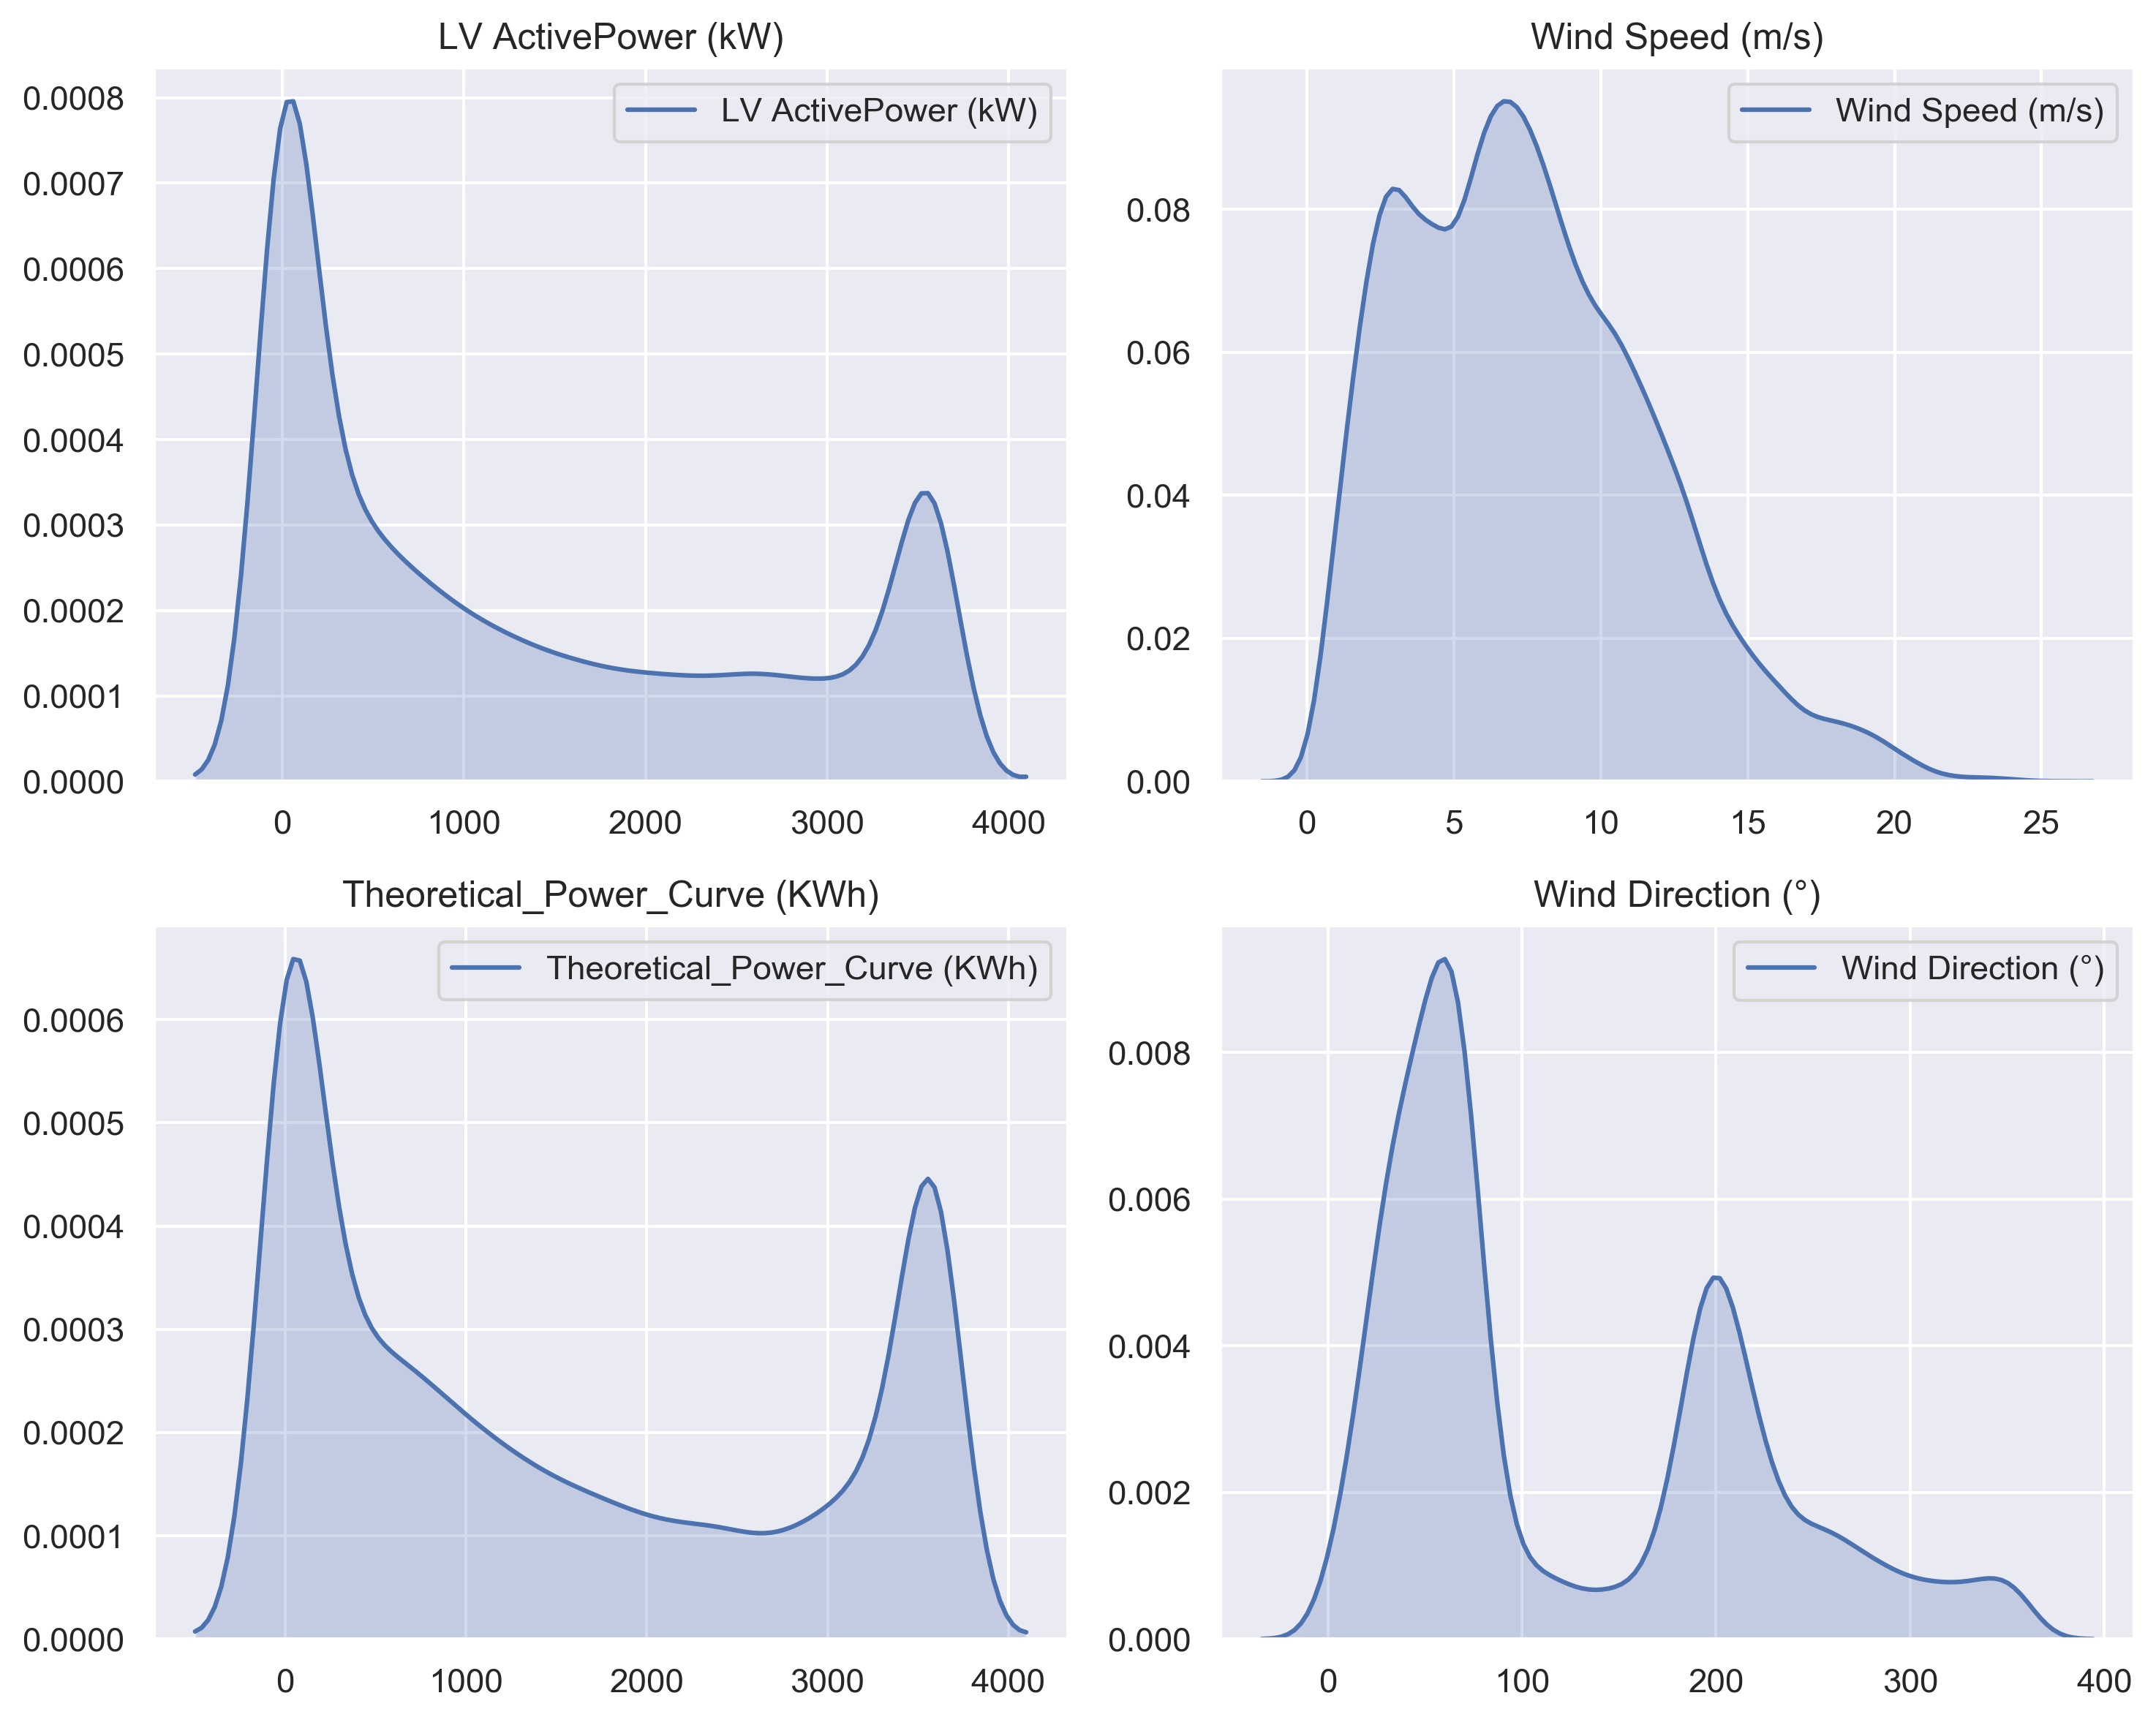

In [14]:
plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.kdeplot(df.iloc[:,i], shade=True)
    plt.title(df.columns[i])
plt.tight_layout()
plt.show()

In [15]:
df.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

<Figure size 3000x2400 with 0 Axes>

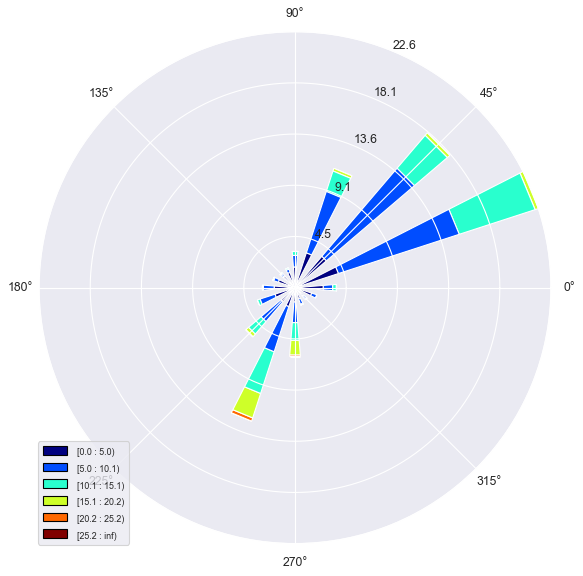

In [17]:
ax = WindroseAxes.from_ax()
ax.bar(df['Wind Direction (°)'], df[ 'Wind Speed (m/s)'], normed=True, 
       opening=0.4, edgecolor='white')
ax.set_legend()

The wind rose plot above shows that the wind direction is mostly from the north east while some significant wind also come from the south-west.

In [18]:
print(df['Wind Direction (°)'].max())
print(df['Wind Direction (°)'].min())

359.99758911132795
0.0


# 特征分箱
- Continuous variable bins;qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
- Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
- #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html

In [29]:
# Bining the data by the wind direction
bins_range_wd = np.arange(0,375,30)
print(bins_range_wd)

[  0  30  60  90 120 150 180 210 240 270 300 330 360]


numpy.digitize(x, bins, right = False)

参数：
- x： numpy数组；
- bins：一维单调数组，必须是升序或者降序；
- right：间隔是否包含分箱边界；

返回值：x在bins中的位置。

In [20]:
# map the data
def feature_bins(x, bins):
    '''
    特征分箱
    '''
    kwargs = {}
    if x == max(bins):
        kwargs['right'] = True
    bin_upper = bins[np.digitize([x], bins, **kwargs)[0]]
    bin_lower = bins[np.digitize([x], bins, **kwargs)[0] - 1]
    
    return '[{0} - {1}]'.format(bin_lower, bin_upper)

In [30]:
df['WD_Bins'] = df['Wind Direction (°)'].apply(feature_bins, bins=bins_range_wd)

In [31]:
df.head()

LV ActivePower (kW)  Wind Speed (m/s)  \
Date/Time                                                 
01 01 2018 00:00           380.047791          5.311336   
01 01 2018 00:10           453.769196          5.672167   
01 01 2018 00:20           306.376587          5.216037   
01 01 2018 00:30           419.645905          5.659674   
01 01 2018 00:40           380.650696          5.577941   

                  Theoretical_Power_Curve (KWh)  Wind Direction (°)  \
Date/Time                                                             
01 01 2018 00:00                     416.328908          259.994904   
01 01 2018 00:10                     519.917511          268.641113   
01 01 2018 00:20                     390.900016          272.564789   
01 01 2018 00:30                     516.127569          271.258087   
01 01 2018 00:40                     491.702972          265.674286   

                      WD_Bins  
Date/Time                      
01 01 2018 00:00  [240 - 270]  
01 01 2018 00:10  [240 - 270]  
01 01 2018 00:20  [270 - 300]  
01 01 2018 00:30  [270 - 300]  
01 01 2018 00:40  [240 - 270]

In [26]:
# group the binned data by mean and std
grouped = df.groupby('WD_Bins')
grouped_std = grouped.std()
grouped_mean = grouped.mean()

In [27]:
grouped_std

LV ActivePower (kW)  Wind Speed (m/s)  \
WD_Bins                                              
[0 - 30]             1124.803223          3.488141   
[120 - 150]           670.866289          2.651661   
[150 - 180]          1394.136497          4.958159   
[180 - 210]          1403.723565          5.164353   
[210 - 240]          1388.763635          4.420727   
[240 - 270]           850.015020          2.964465   
[270 - 300]           696.578288          2.536008   
[30 - 60]            1186.466629          3.243051   
[300 - 330]           788.854945          2.822233   
[330 - 360]           885.034418          3.010176   
[60 - 90]            1266.266961          3.491741   
[90 - 120]            350.332726          1.740294   

             Theoretical_Power_Curve (KWh)  Wind Direction (°)  
WD_Bins                                                         
[0 - 30]                       1230.955928            8.148837  
[120 - 150]                     767.647563            9.044601  
[150 - 180]                    1430.956097            8.763010  
[180 - 210]                    1389.141393            7.846312  
[210 - 240]                    1422.899361            8.139287  
[240 - 270]                     960.642008            8.488195  
[270 - 300]                     757.395547            8.489532  
[30 - 60]                      1234.193244            8.919180  
[300 - 330]                     873.994443            8.598746  
[330 - 360]                     982.192710            8.782761  
[60 - 90]                      1333.842700            6.863167  
[90 - 120]                      361.109681            8.975247

In [25]:
grouped_mean

LV ActivePower (kW)  Wind Speed (m/s)  \
WD_Bins                                              
[0 - 30]              930.510040          6.653266   
[120 - 150]           367.272423          4.154992   
[150 - 180]          1215.515627          7.112663   
[180 - 210]          2191.352747         10.858810   
[210 - 240]          1481.711464          7.989767   
[240 - 270]           549.913423          5.099395   
[270 - 300]           344.182127          4.091093   
[30 - 60]            1410.394228          7.885510   
[300 - 330]           321.403521          3.793158   
[330 - 360]           425.090086          4.207122   
[60 - 90]            1461.560925          7.929172   
[90 - 120]            178.853627          3.505363   

             Theoretical_Power_Curve (KWh)  Wind Direction (°)  
WD_Bins                                                         
[0 - 30]                       1206.216925           19.267352  
[120 - 150]                     440.095227          135.100030  
[150 - 180]                    1298.965073          168.707640  
[180 - 210]                    2345.251285          196.474880  
[210 - 240]                    1640.146993          221.999853  
[240 - 270]                     685.520754          254.586112  
[270 - 300]                     409.169186          283.795749  
[30 - 60]                      1646.114905           45.943141  
[300 - 330]                     385.739163          314.689829  
[330 - 360]                     516.199021          346.219409  
[60 - 90]                      1676.345002           70.213985  
[90 - 120]                      191.625050          104.284852

The analysis above shows that highest avearge wind speed was recorded around 180(°)-225(°).

Contrary to the opinion once had from the windrose plot, south - southwest shows good site for wind turbine because it has the highest avearge wind speed. The region also also has highest theoretical power amd LV active power.

In [28]:
# Checking for maximum and minimum value of the windspeed to help in choosing the right binning value
print(df['Wind Speed (m/s)'].max())
print(df['Wind Speed (m/s)'].min())

25.2060108184814
0.0


In [32]:
# Bining the data by the wind speed
bins_range_ws = np.arange(0,26,0.5)

In [34]:
df['WS_Bins'] = df['Wind Speed (m/s)'].apply(feature_bins, bins=bins_range_ws)
grouped = df.groupby('WS_Bins')
grouped_std = grouped.std()
grouped_mean = grouped.mean()

In [35]:
grouped_mean

LV ActivePower (kW)  Wind Speed (m/s)  \
WS_Bins                                                
[0.0 - 0.5]               0.000000          0.365804   
[0.5 - 1.0]               0.000000          0.778586   
[1.0 - 1.5]               0.000411          1.260064   
[1.5 - 2.0]               0.010590          1.759065   
[10.0 - 10.5]          2337.270905         10.253631   
[10.5 - 11.0]          2622.546737         10.748151   
[11.0 - 11.5]          2858.359373         11.250353   
[11.5 - 12.0]          3142.711254         11.746023   
[12.0 - 12.5]          3311.716786         12.235626   
[12.5 - 13.0]          3399.230946         12.734817   
[13.0 - 13.5]          3461.541262         13.234760   
[13.5 - 14.0]          3437.329427         13.735134   
[14.0 - 14.5]          3346.402636         14.244160   
[14.5 - 15.0]          3277.812776         14.743941   
[15.0 - 15.5]          3450.968504         15.246197   
[15.5 - 16.0]          3429.492375         15.755537   
[16.0 - 16.5]          3472.428529         16.245875   
[16.5 - 17.0]          3490.019377         16.744082   
[17.0 - 17.5]          3493.432480         17.245462   
[17.5 - 18.0]          3547.503648         17.740810   
[18.0 - 18.5]          3546.267684         18.247225   
[18.5 - 19.0]          3546.643004         18.737283   
[19.0 - 19.5]          3553.650078         19.250298   
[19.5 - 20.0]          3572.176268         19.720386   
[2.0 - 2.5]               0.147161          2.257685   
[2.5 - 3.0]               1.573017          2.748982   
[20.0 - 20.5]          3563.737667         20.245513   
[20.5 - 21.0]          3570.665316         20.721941   
[21.0 - 21.5]          3561.570438         21.229620   
[21.5 - 22.0]          3561.487630         21.816660   
[22.0 - 22.5]          3571.854932         22.225620   
[22.5 - 23.0]          3601.627384         22.782828   
[23.0 - 23.5]          3601.182861         23.264395   
[23.5 - 24.0]          3601.594330         23.723268   
[24.0 - 24.5]          3601.124186         24.090772   
[24.5 - 25.0]          3602.022949         24.587030   
[25.0 - 25.5]          3600.780029         25.206011   
[3.0 - 3.5]              11.050656          3.240103   
[3.5 - 4.0]              52.400688          3.748835   
[4.0 - 4.5]             122.285245          4.251673   
[4.5 - 5.0]             217.627315          4.745835   
[5.0 - 5.5]             324.317718          5.259840   
[5.5 - 6.0]             449.559879          5.755264   
[6.0 - 6.5]             584.742626          6.251456   
[6.5 - 7.0]             768.078805          6.752764   
[7.0 - 7.5]             967.532189          7.253347   
[7.5 - 8.0]            1198.022103          7.750484   
[8.0 - 8.5]            1413.798709          8.250909   
[8.5 - 9.0]            1641.452914          8.747404   
[9.0 - 9.5]            1867.102063          9.248591   
[9.5 - 10.0]           2100.245163          9.748743   

               Theoretical_Power_Curve (KWh)  Wind Direction (°)  
WS_Bins                                                           
[0.0 - 0.5]                         0.000000          162.505971  
[0.5 - 1.0]                         0.000000          170.854432  
[1.0 - 1.5]                         0.000000          175.189300  
[1.5 - 2.0]                         0.000000          176.404131  
[10.0 - 10.5]                    2937.008035           96.637178  
[10.5 - 11.0]                    3173.479505           95.600305  
[11.0 - 11.5]                    3351.673813          104.367578  
[11.5 - 12.0]                    3474.949240          109.737906  
[12.0 - 12.5]                    3552.269674          114.318559  
[12.5 - 13.0]                    3591.080794          119.538932  
[13.0 - 13.5]                    3600.000000          119.903896  
[13.5 - 14.0]                    3600.000000          123.675148  
[14.0 - 14.5]                    3600.000000          134.325467  
[14.5 - 15.0]                    3600.000

In [36]:
bins_range_ws

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5])

In [37]:
# rearrange the index for proper visualisation
step = bins_range_ws[1] - bins_range_ws[0]
new_index = ['[{0} - {1}]'.format(x, x+step) for x in bins_range_ws]
new_index.pop(-1) # 丢弃最后一个区间
grouped_mean = grouped_mean.reindex(new_index)
grouped_mean

LV ActivePower (kW)  Wind Speed (m/s)  \
WS_Bins                                                
[0.0 - 0.5]               0.000000          0.365804   
[0.5 - 1.0]               0.000000          0.778586   
[1.0 - 1.5]               0.000411          1.260064   
[1.5 - 2.0]               0.010590          1.759065   
[2.0 - 2.5]               0.147161          2.257685   
[2.5 - 3.0]               1.573017          2.748982   
[3.0 - 3.5]              11.050656          3.240103   
[3.5 - 4.0]              52.400688          3.748835   
[4.0 - 4.5]             122.285245          4.251673   
[4.5 - 5.0]             217.627315          4.745835   
[5.0 - 5.5]             324.317718          5.259840   
[5.5 - 6.0]             449.559879          5.755264   
[6.0 - 6.5]             584.742626          6.251456   
[6.5 - 7.0]             768.078805          6.752764   
[7.0 - 7.5]             967.532189          7.253347   
[7.5 - 8.0]            1198.022103          7.750484   
[8.0 - 8.5]            1413.798709          8.250909   
[8.5 - 9.0]            1641.452914          8.747404   
[9.0 - 9.5]            1867.102063          9.248591   
[9.5 - 10.0]           2100.245163          9.748743   
[10.0 - 10.5]          2337.270905         10.253631   
[10.5 - 11.0]          2622.546737         10.748151   
[11.0 - 11.5]          2858.359373         11.250353   
[11.5 - 12.0]          3142.711254         11.746023   
[12.0 - 12.5]          3311.716786         12.235626   
[12.5 - 13.0]          3399.230946         12.734817   
[13.0 - 13.5]          3461.541262         13.234760   
[13.5 - 14.0]          3437.329427         13.735134   
[14.0 - 14.5]          3346.402636         14.244160   
[14.5 - 15.0]          3277.812776         14.743941   
[15.0 - 15.5]          3450.968504         15.246197   
[15.5 - 16.0]          3429.492375         15.755537   
[16.0 - 16.5]          3472.428529         16.245875   
[16.5 - 17.0]          3490.019377         16.744082   
[17.0 - 17.5]          3493.432480         17.245462   
[17.5 - 18.0]          3547.503648         17.740810   
[18.0 - 18.5]          3546.267684         18.247225   
[18.5 - 19.0]          3546.643004         18.737283   
[19.0 - 19.5]          3553.650078         19.250298   
[19.5 - 20.0]          3572.176268         19.720386   
[20.0 - 20.5]          3563.737667         20.245513   
[20.5 - 21.0]          3570.665316         20.721941   
[21.0 - 21.5]          3561.570438         21.229620   
[21.5 - 22.0]          3561.487630         21.816660   
[22.0 - 22.5]          3571.854932         22.225620   
[22.5 - 23.0]          3601.627384         22.782828   
[23.0 - 23.5]          3601.182861         23.264395   
[23.5 - 24.0]          3601.594330         23.723268   
[24.0 - 24.5]          3601.124186         24.090772   
[24.5 - 25.0]          3602.022949         24.587030   
[25.0 - 25.5]          3600.780029         25.206011   

               Theoretical_Power_Curve (KWh)  Wind Direction (°)  
WS_Bins                                                           
[0.0 - 0.5]                         0.000000          162.505971  
[0.5 - 1.0]                         0.000000          170.854432  
[1.0 - 1.5]                         0.000000          175.189300  
[1.5 - 2.0]                         0.000000          176.404131  
[2.0 - 2.5]                         0.000000          165.121134  
[2.5 - 3.0]                         0.000000          158.107974  
[3.0 - 3.5]                        29.953759          144.551439  
[3.5 - 4.0]                        86.474149          139.208026  
[4.0 - 4.5]                       171.736466          137.531497  
[4.5 - 5.0]                       276.645981          123.819726  
[5.0 - 5.5]                       403.378587          120.212117  
[5.5 - 6.0]                       546.536159          112.437549  
[6.0 - 6.5]                       713.280130          106.344603  
[6.5 - 7.0]                       909.683

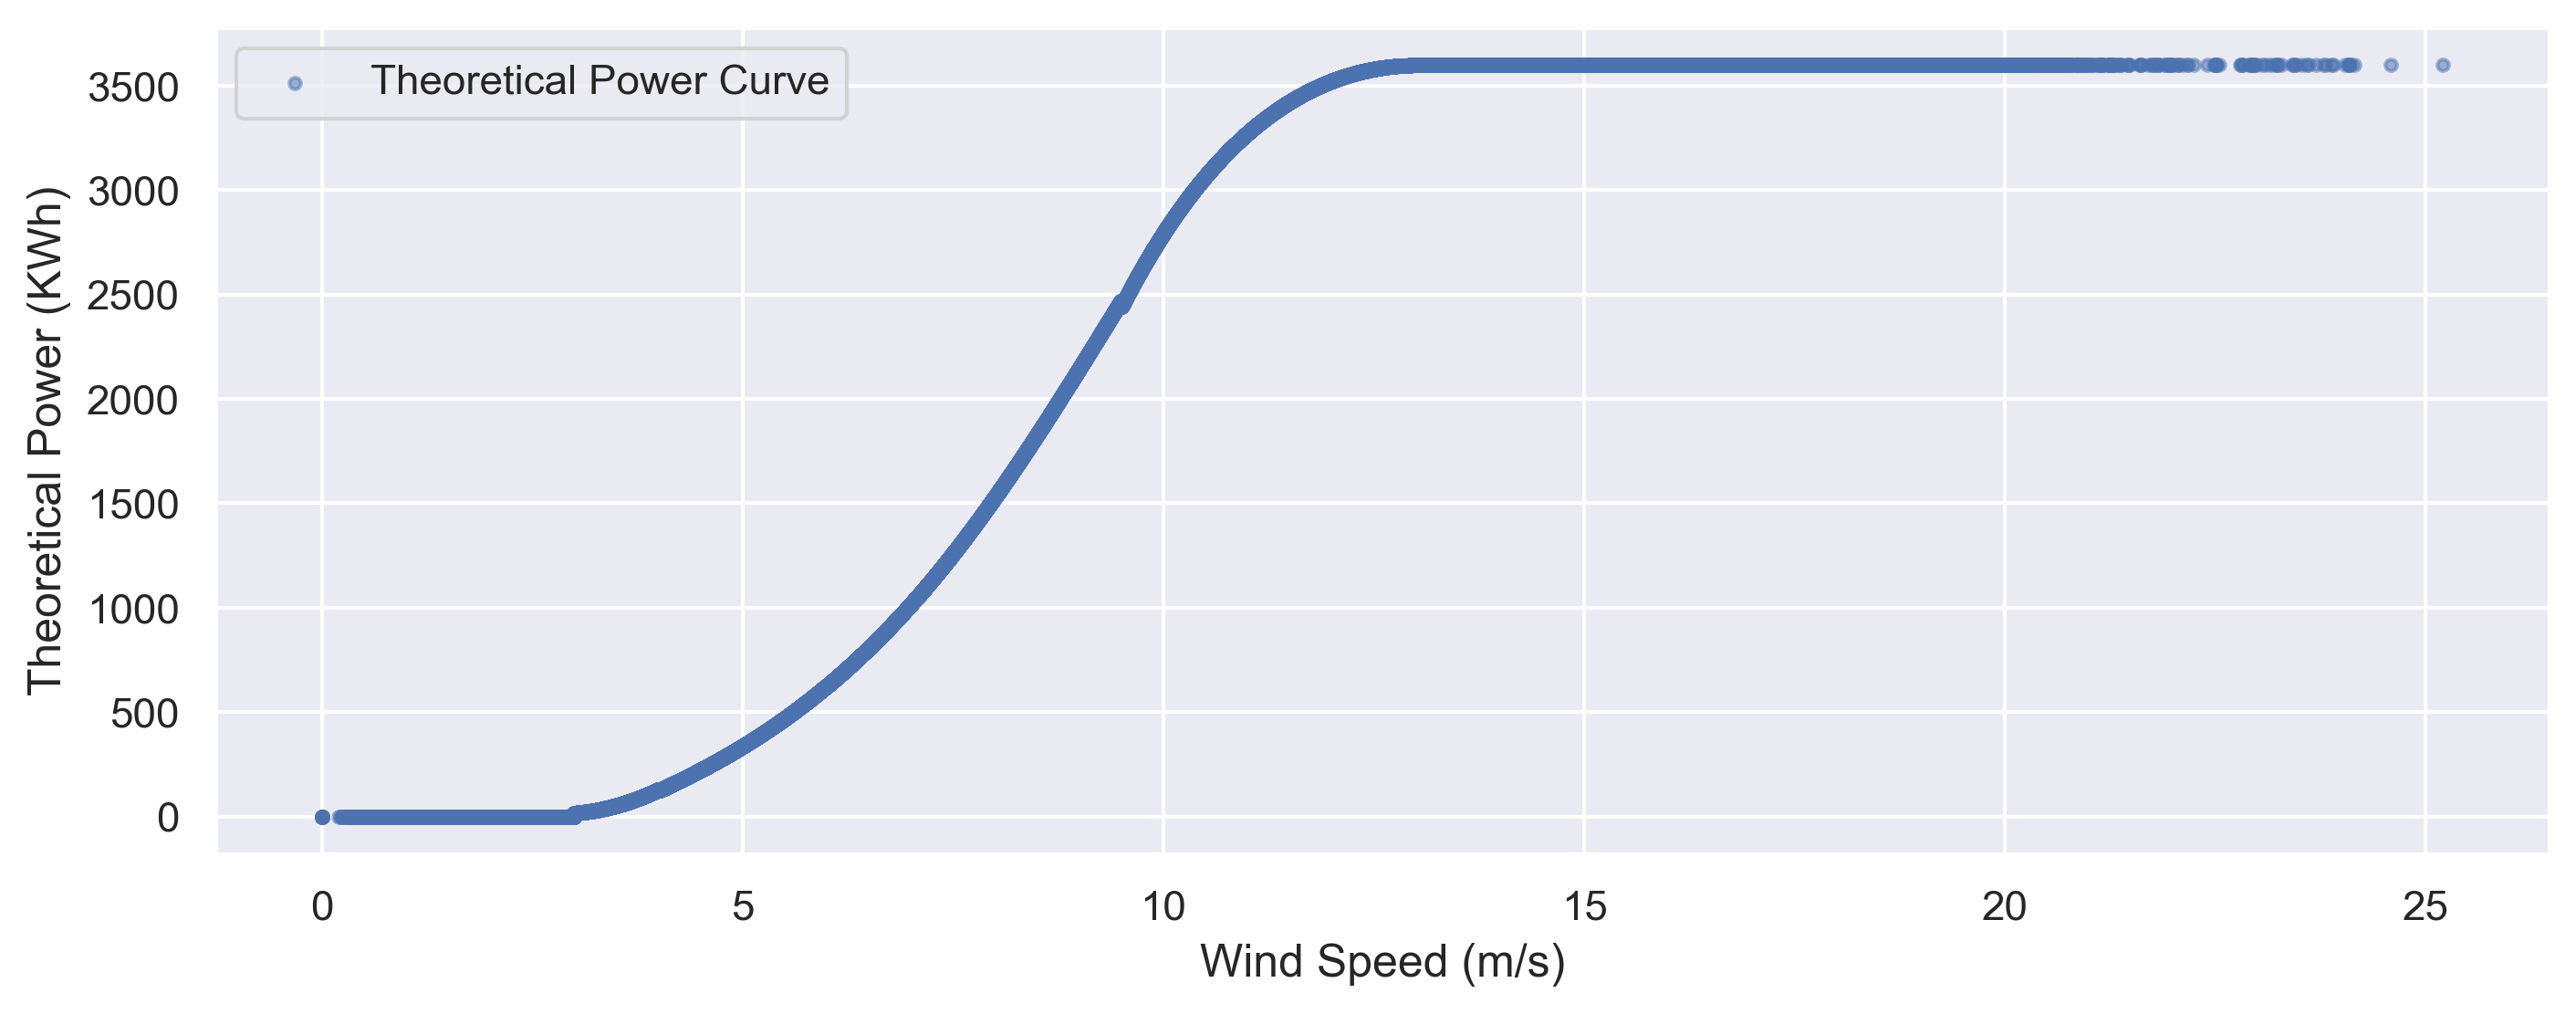

In [42]:
plt.scatter(df['Wind Speed (m/s)'], df['Theoretical_Power_Curve (KWh)'], marker='.', alpha=0.5)
plt.ylabel('Theoretical Power (KWh)')
plt.xlabel('Wind Speed (m/s)')
plt.grid(True)
plt.legend(['Theoretical Power Curve'], loc='upper left')
plt.show()

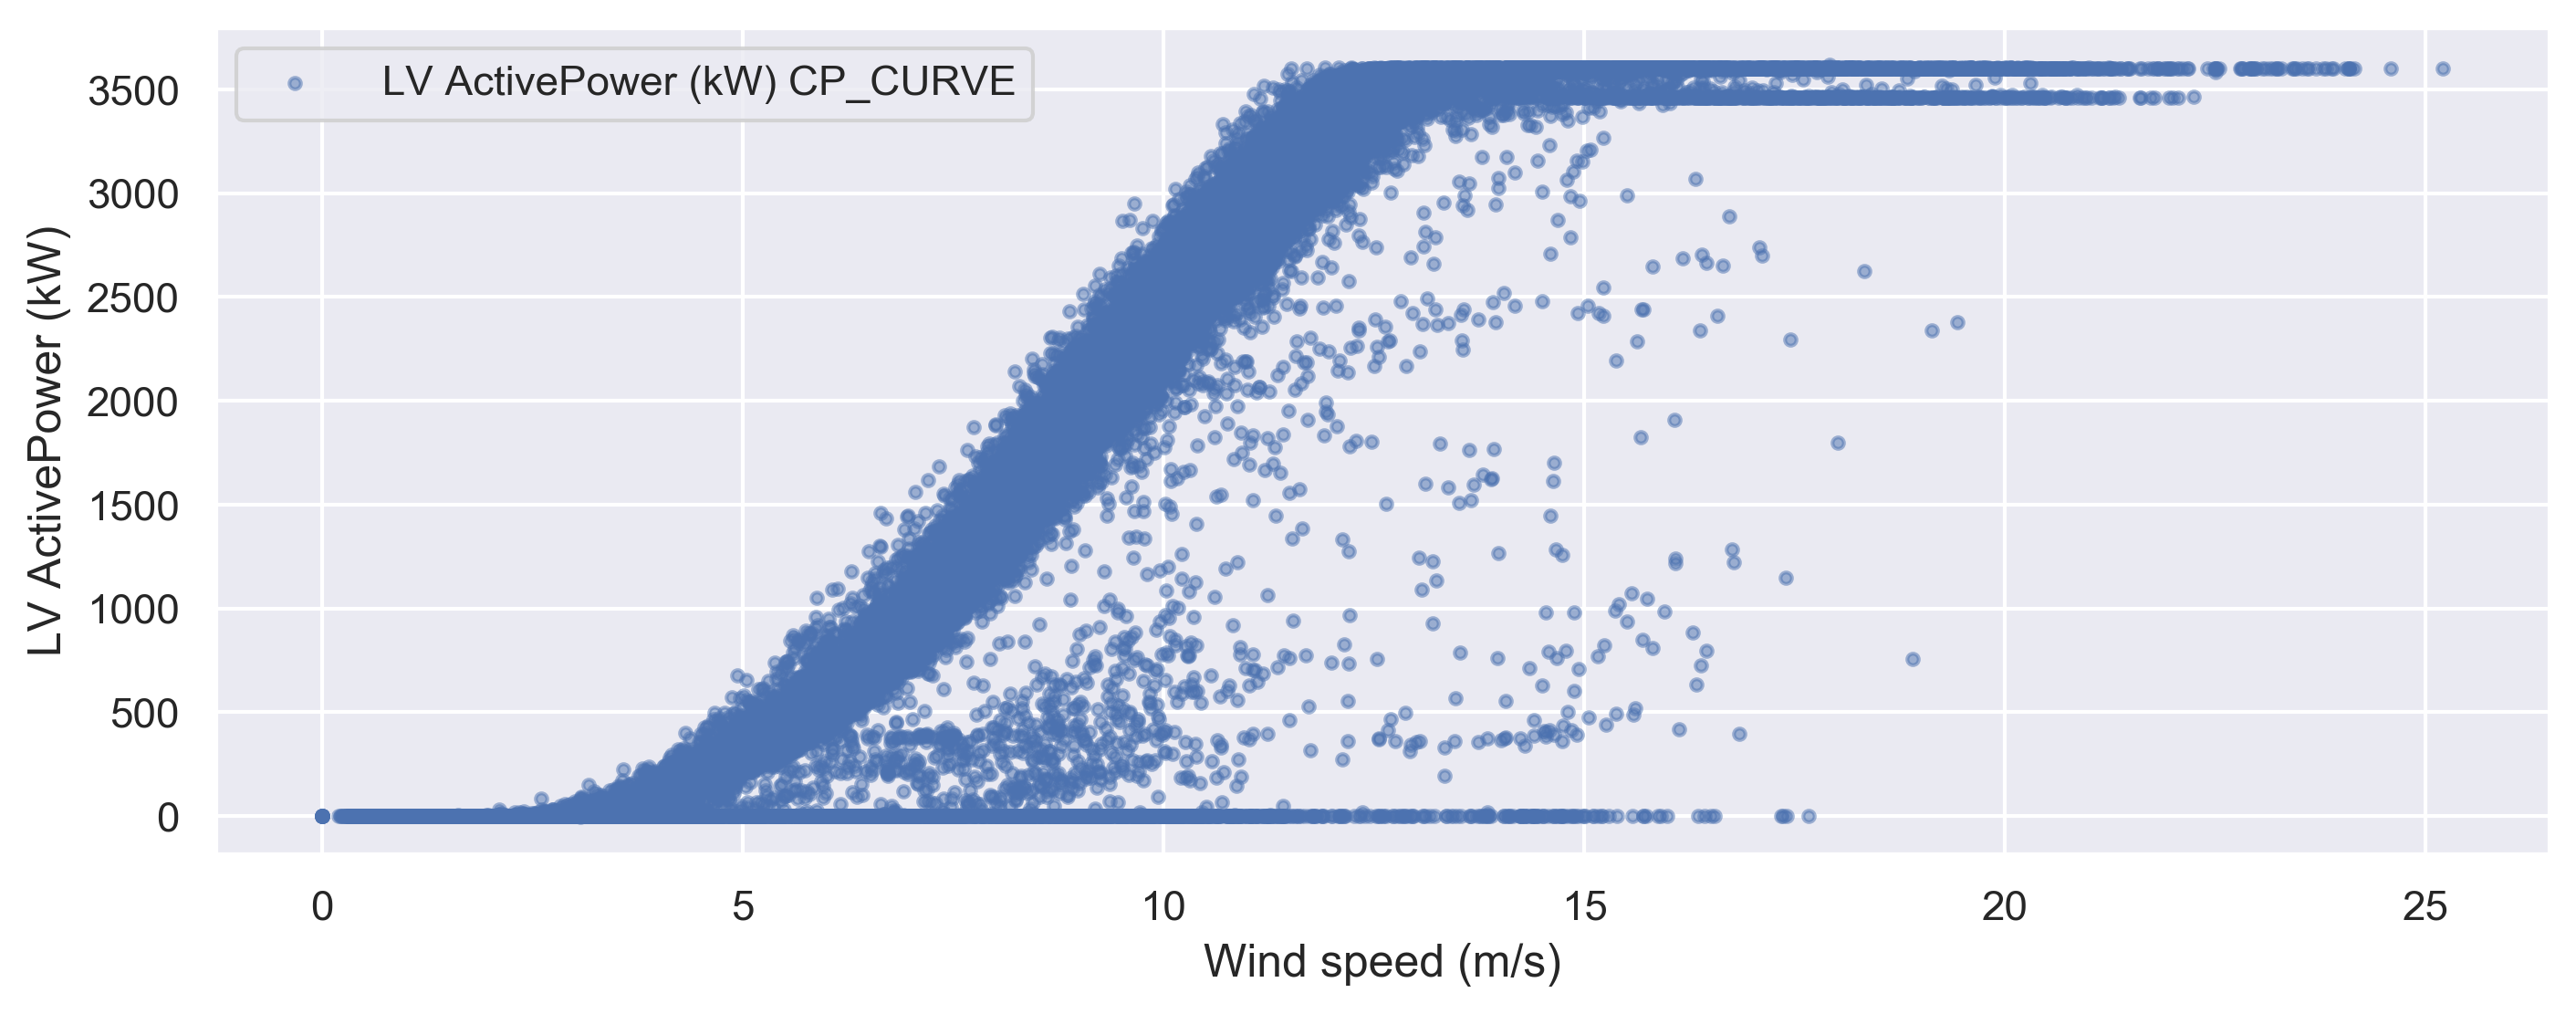

In [43]:
plt.scatter(df['Wind Speed (m/s)'], df['LV ActivePower (kW)'], marker='.', alpha=0.5)
plt.ylabel('LV ActivePower (kW)')
plt.xlabel('Wind speed (m/s)')
plt.grid(True)
plt.legend([' LV ActivePower (kW) CP_CURVE'], loc='upper left')
plt.show()

Using the information gathered above, we can now set a filter condition for our LV ActivePower (kW) power curve

Note: The filter information will be done manually based on the knoweldge gathered above.

In [51]:
# The first step is the removal of downtime events, which can be identified as near-zero power at high wind speeds.

# Eliminate datas where wind speed is bigger than 3.5 and active power is zero.

new_df = df[((df['LV ActivePower (kW)']!=0) & (df['Wind Speed (m/s)']>3.5)) | (df["Wind Speed (m/s)"]<=3.5)]
new_1 = (new_df[(new_df['Wind Speed (m/s)'] < 12.5) | (new_df['LV ActivePower (kW)'] >= 3000)])
new_2 = (new_1[(new_1['Wind Speed (m/s)'] < 9.5) | (new_1['LV ActivePower (kW)'] >= 1500)])
new_3 = (new_2[(new_2['Wind Speed (m/s)'] < 6.5) | (new_2['LV ActivePower (kW)'] >= 500)])

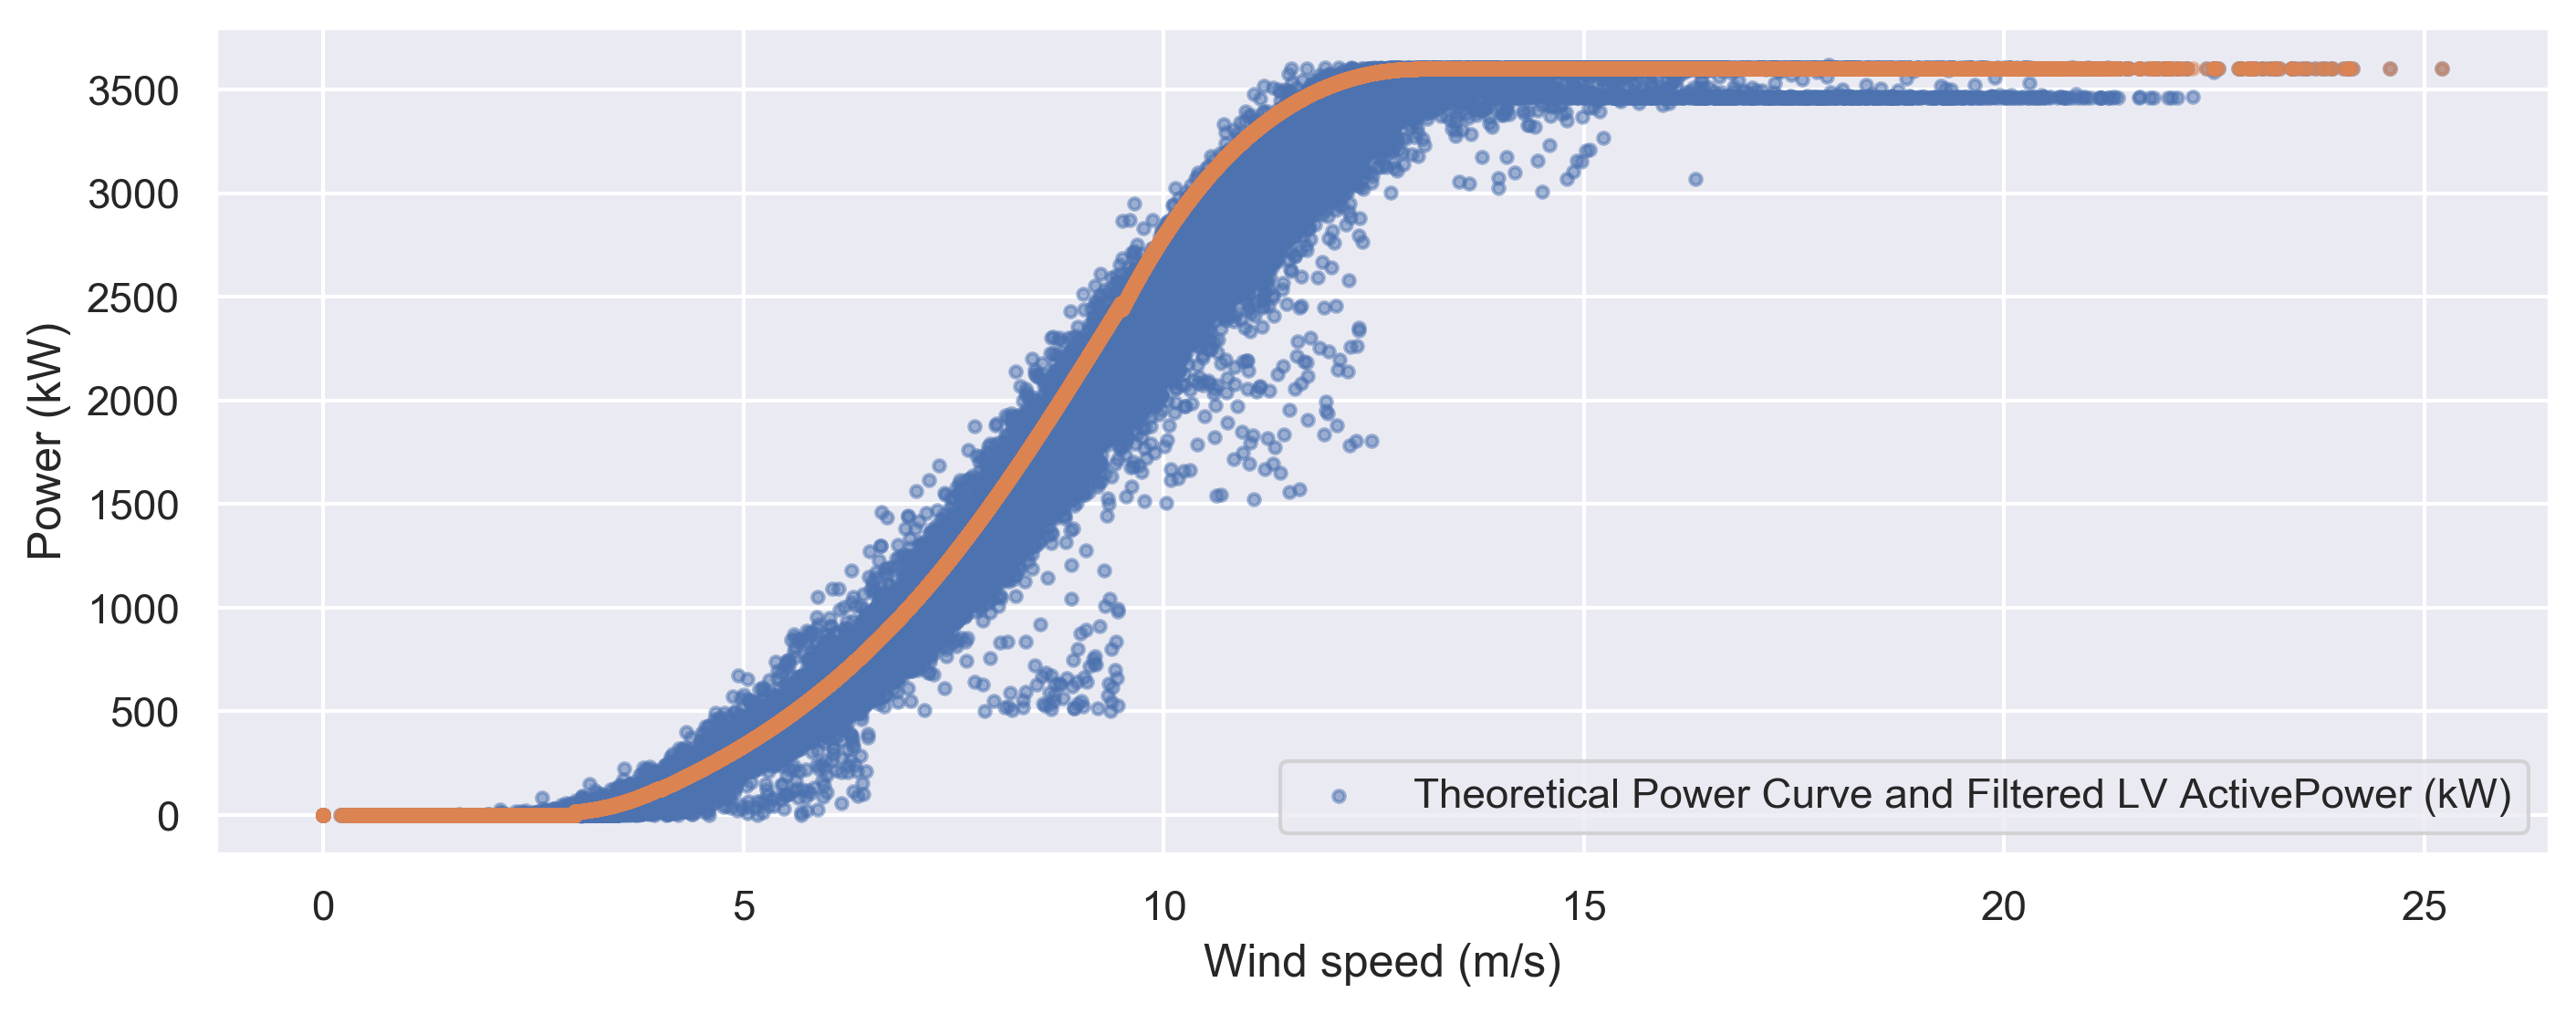

In [54]:
# Theoretical_Power_Curve and Filtered LV ActivePower (kW) CP_CURVE Visualisation

plt.scatter(new_3['Wind Speed (m/s)'], new_3['LV ActivePower (kW)'], marker='.', alpha=0.5)
plt.scatter(df['Wind Speed (m/s)'],df['Theoretical_Power_Curve (KWh)'], label='Theoretical_Power_Curve (KWh)', marker='.', alpha=0.5)
plt.ylabel('Power (kW)')
plt.xlabel('Wind speed (m/s)')
plt.grid(True)
plt.legend(['Theoretical Power Curve and Filtered LV ActivePower (kW)'], loc='lower right')
plt.show()

The filtered power curve can still be improved. You can suggest best filter condition.


# Feature Engineering

Generating more features from the limited data given.

In [44]:
# Function to create more feature as WS and  Category

def CP_group(val):
    if val<3.5:
        return 'Region_1'
    
    elif val> 3.5 and val < 10:
        return 'Region_1.5'
    
    elif val>10 and val < 15:
        return 'Region_2'
    
    elif val>15 and val < 23:
        return 'Region_2.5'
    
    else:
        return 'Region_3'
    
df['Operational Category'] = df['Wind Speed (m/s)'].apply(CP_group)

In [45]:
df.head(5)

LV ActivePower (kW)  Wind Speed (m/s)  \
Date/Time                                                 
01 01 2018 00:00           380.047791          5.311336   
01 01 2018 00:10           453.769196          5.672167   
01 01 2018 00:20           306.376587          5.216037   
01 01 2018 00:30           419.645905          5.659674   
01 01 2018 00:40           380.650696          5.577941   

                  Theoretical_Power_Curve (KWh)  Wind Direction (°)  \
Date/Time                                                             
01 01 2018 00:00                     416.328908          259.994904   
01 01 2018 00:10                     519.917511          268.641113   
01 01 2018 00:20                     390.900016          272.564789   
01 01 2018 00:30                     516.127569          271.258087   
01 01 2018 00:40                     491.702972          265.674286   

                      WD_Bins      WS_Bins Operational Category  
Date/Time                                                        
01 01 2018 00:00  [240 - 270]  [5.0 - 5.5]           Region_1.5  
01 01 2018 00:10  [240 - 270]  [5.5 - 6.0]           Region_1.5  
01 01 2018 00:20  [270 - 300]  [5.0 - 5.5]           Region_1.5  
01 01 2018 00:30  [270 - 300]  [5.5 - 6.0]           Region_1.5  
01 01 2018 00:40  [240 - 270]  [5.5 - 6.0]           Region_1.5

The feature generated is Operational category and windspeed bin, which can be converted into dummy variable for further ML prediction. For operational category, regions are derived from the operational state of wind turbine according to the data provided. 

- Region_1.0 : Non-operational 
- Region_1.5 : Max Rotor Efficinecy 
- Region_2.0 : Rated 
- Region_2.5 : Reduced Rotor Efficiency 
- Region_3.0 : Cut-out

In [ ]:
# Converting the categorical data into variable

In [47]:
df.dtypes

LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
WD_Bins                           object
WS_Bins                           object
Operational Category              object
dtype: object

In [48]:
# Splitting the data into categorical data and float
df_float = df[df.dtypes[df.dtypes == 'float'].index]
df_object = df[df.dtypes[df.dtypes == 'object'].index]

In [49]:
df_object = pd.get_dummies(df_object)

In [ ]:
# df_object_score = 

In [50]:
result = df_float.join([df_object])
result.head(5)

LV ActivePower (kW)  Wind Speed (m/s)  \
Date/Time                                                 
01 01 2018 00:00           380.047791          5.311336   
01 01 2018 00:10           453.769196          5.672167   
01 01 2018 00:20           306.376587          5.216037   
01 01 2018 00:30           419.645905          5.659674   
01 01 2018 00:40           380.650696          5.577941   

                  Theoretical_Power_Curve (KWh)  Wind Direction (°)  \
Date/Time                                                             
01 01 2018 00:00                     416.328908          259.994904   
01 01 2018 00:10                     519.917511          268.641113   
01 01 2018 00:20                     390.900016          272.564789   
01 01 2018 00:30                     516.127569          271.258087   
01 01 2018 00:40                     491.702972          265.674286   

                  WD_Bins_[0 - 30]  WD_Bins_[120 - 150]  WD_Bins_[150 - 180]  \
Date/Time                                                                      
01 01 2018 00:00                 0                    0                    0   
01 01 2018 00:10                 0                    0                    0   
01 01 2018 00:20                 0                    0                    0   
01 01 2018 00:30                 0                    0                    0   
01 01 2018 00:40                 0                    0                    0   

                  WD_Bins_[180 - 210]  WD_Bins_[210 - 240]  \
Date/Time                                                    
01 01 2018 00:00                    0                    0   
01 01 2018 00:10                    0                    0   
01 01 2018 00:20                    0                    0   
01 01 2018 00:30                    0                    0   
01 01 2018 00:40                    0                    0   

                  WD_Bins_[240 - 270]  ...  WS_Bins_[7.5 - 8.0]  \
Date/Time                              ...                        
01 01 2018 00:00                    1  ...                    0   
01 01 2018 00:10                    1  ...                    0   
01 01 2018 00:20                    0  ...                    0   
01 01 2018 00:30                    0  ...                    0   
01 01 2018 00:40                    1  ...                    0   

                  WS_Bins_[8.0 - 8.5]  WS_Bins_[8.5 - 9.0]  \
Date/Time                                                    
01 01 2018 00:00                    0                    0   
01 01 2018 00:10                    0                    0   
01 01 2018 00:20                    0                    0   
01 01 2018 00:30                    0                    0   
01 01 2018 00:40                    0                    0   

                  WS_Bins_[9.0 - 9.5]  WS_Bins_[9.5 - 10.0]  \
Date/Time                                                     
01 01 2018 00:00                    0                     0   
01 01 2018 00:10                    0                     0   
01 01 2018 00:20                    0                     0   
01 01 2018 00:30                    0                     0   
01 01 2018 00:40                    0                     0   

                  Operational Category_Region_1  \
Date/Time                                         
01 01 2018 00:00                              0   
01 01 2018 00:10                              0   
01 01 2018 00:20                              0   
01 01 2018 00:30                              0   
01 01 2018 00:40                              0   

                  Operational Category_Region_1.5  \
Date/Time                                           
01 01 2018 00:00                                1   
01 01 2018 00:10                                1   
01 01 2018 00:20                                1   
01 01 2018 00:30                                1   
01 01 2018 00:40                                1   

                  Operational Cat